# Evaluate the classifier

In file 7_ I created the classifiers for the initial experiment setup. 
Now I need to evaluate them 

In [1]:
import numpy as np
import sklearn 
from sklearn.neighbors import KDTree
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn import metrics
import pandas as pd
from sklearn.externals import joblib

In [2]:
NN = 100

In [3]:
# Uploadng my datasets
# Define a data frame with all my data# Define  
FILE_PATH = r"../DATA/ML_datasets/Initial_setup"
META_FILE_PATH = "../DATA/META"
IMAGE_FILE_PATH = r"images"

# Training data
y_train = np.loadtxt(FILE_PATH+'/y_train_'+ str(NN) +'NN_3842samples.txt', delimiter=',')
X_train = np.loadtxt(FILE_PATH+'/X_train_'+ str(NN) +'NN_3842samples.txt', delimiter=',')

# Testing data
y_test = np.loadtxt(FILE_PATH+'/y_test_'+ str(NN) +'NN.txt', delimiter=',')
X_test = np.loadtxt(FILE_PATH+'/X_test_'+ str(NN) +'NN.txt', delimiter=',')

In [4]:
# For RF classifier: cast as float32 
y_train = y_train.astype('float32')
X_train = X_train.astype('float32')
y_test = y_test.astype('float32')
X_test = X_test.astype('float32')

In [5]:
###uploading the saved classifier
filename = '/randomforest_model_'+ str(NN) +'NN_downsample.sav'
clf = joblib.load(FILE_PATH + filename)

## Make predictions

Now predict values for the whole training set (on data the model has seen before)

In [6]:
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

np.savetxt(FILE_PATH+'/predictions_train_'+ str(NN) +'NN_downsample.txt', predictions_train, delimiter=',')
np.savetxt(FILE_PATH+'/predictions_test_'+ str(NN) +'NN_downsample.txt', predictions_test, delimiter=',')

print "This is the number of NN:", NN

This is the number of NN: 100


## Now evaluate the model

In [7]:
score_train = clf.score(X_train, y_train)
print "Score on training dataset:", score_train

Score on training dataset: 0.6606060606060606


In [8]:
score_test = clf.score(X_test, y_test)
print "Score on testing dataset:", score_test

Score on testing dataset: 0.6547527006834327


In [9]:
# New code
import pylab as plt
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Normalized confusion matrix


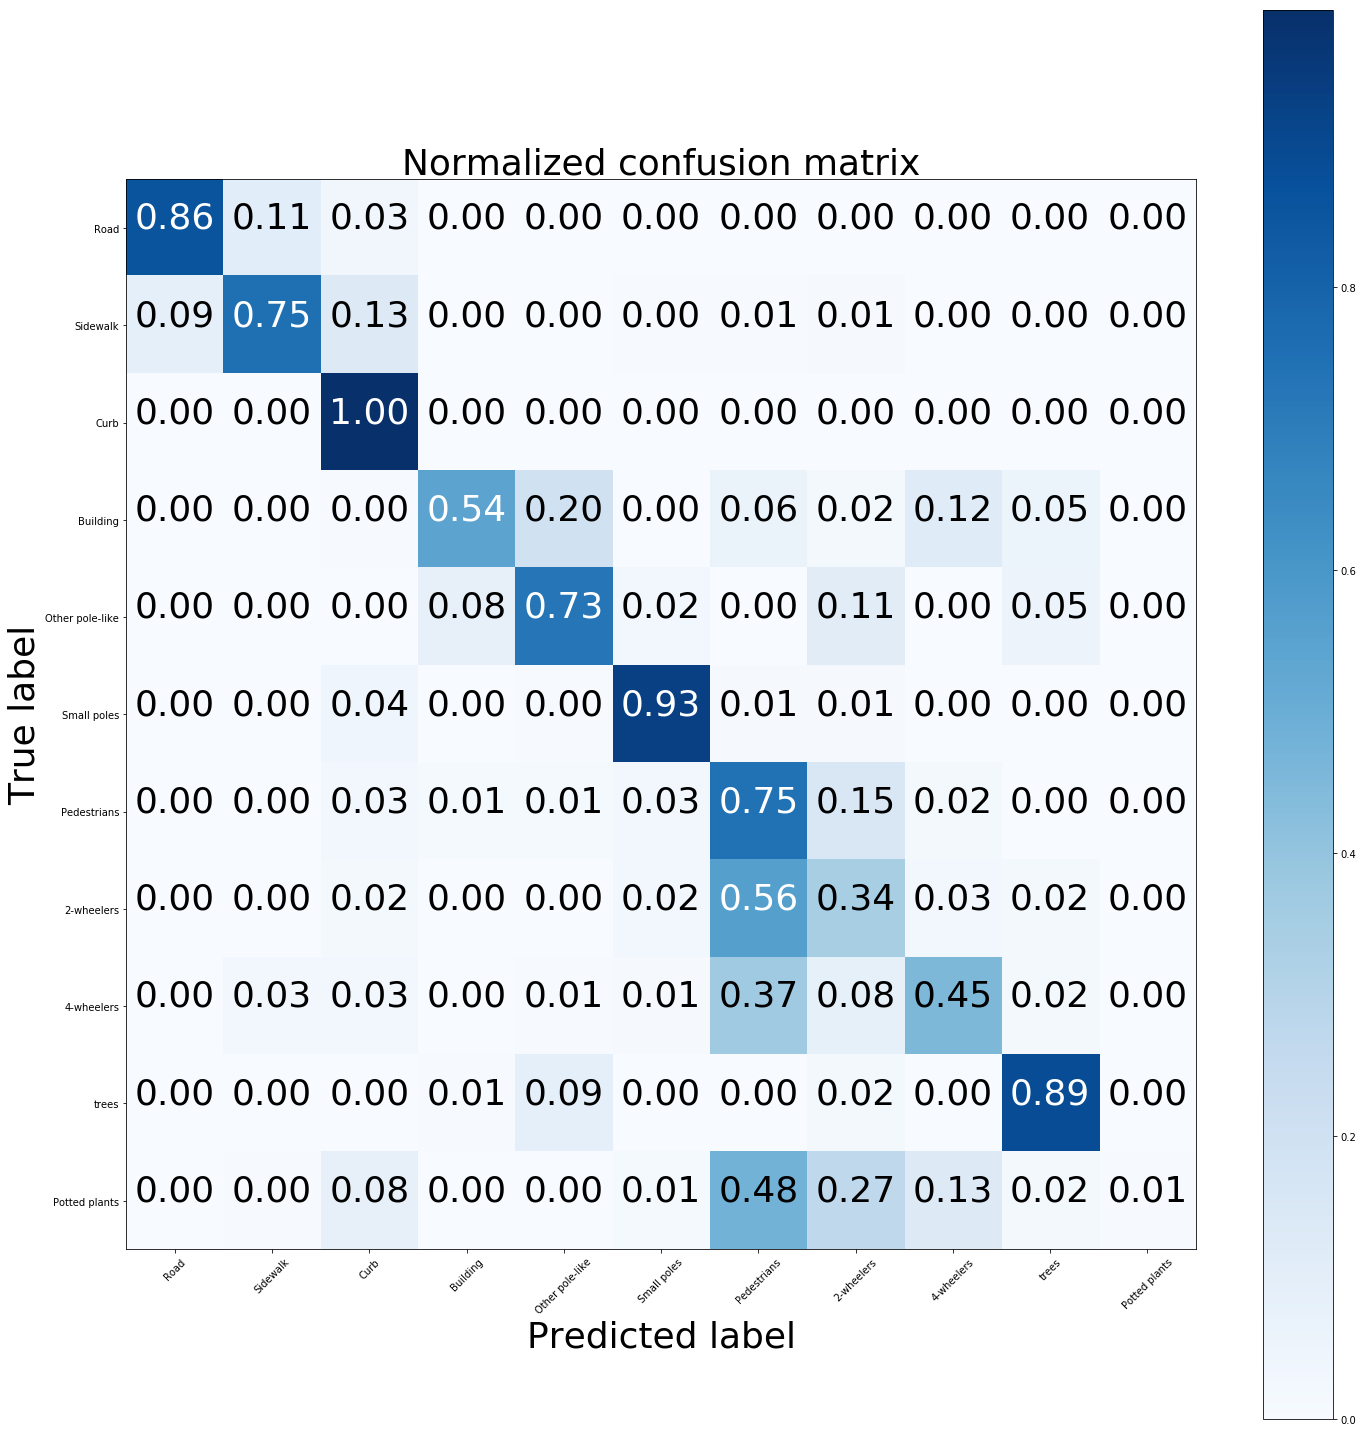

In [11]:
# Create the confusion matrix
class_names = ['Road', 'Sidewalk', 'Curb', 'Building', 'Other pole-like', 
                'Small poles', 'Pedestrians', '2-wheelers', '4-wheelers','trees', 'Potted plants']
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=36)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),fontsize=36,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=36)
    plt.xlabel('Predicted label',fontsize=36)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure(figsize=(20,20))
#plot_confusion_matrix(cnf_matrix, classes=class_names,
                      #title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig(FILE_PATH+"/ConfusionMatrixScenarioB")

plt.show()